# Exploration02 - Iris의 세 가지 품종, 분류해볼 수 있겠어요?

scikit-learn을 이용하여 여러 가지 분류기를 만들어보자

---

### 루브릭 평가 기준

1. 3가지 데이터셋의 구성 - feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개되었나
2. 각각 5가지 모델 성공 - 모델 학습 및 테스트가 정상적으로 수행되었나
3. 모델의 평가지표 선정 - 평가지표 선택 및 이유가 타당한가

---

### 목차

0. 필요 모듈 import


1. 손글씨 분류
    - 데이터 로드 및 확인
    - 데이터 분리   
    - Decision Tree
    - Random Forest
    - SVM
    - SGD Classifier
    - Logistic Regression
    - 결과 분석
    

2. 와인 분류
    - 데이터 로드 및 확인
    - 데이터 분리   
    - Decision Tree
    - Random Forest
    - SVM
    - SGD Classifier
    - Logistic Regression
    - 결과 분석


3. 유방암 진단
    - 데이터 로드 및 확인
    - 데이터 분리   
    - Decision Tree
    - Random Forest
    - SVM
    - SGD Classifier
    - Logistic Regression
    - 결과 분석


4. 회고


5. 참고 자료

## 0. 필요 모듈 import

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 분류를 위한 모델을 담고 있는 사이킷런 모듈
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 1.손글씨 분류

### 데이터 로드 및 확인

load_digits( )를 이용해 데이터를 로드하고 데이터를 확인해보자.

In [2]:
# 데이터 로드를 위한 모듈 import
from sklearn.datasets import load_digits

In [3]:
# 데이터 로드
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

print('데이터 로드 완료! ( ᐛ )و')

데이터 로드 완료! ( ᐛ )و


In [4]:
# 데이터 확인
print(digits.keys())
print(digits.target_names)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]


- digits에 담겨있는 정보를 확인해보자.
- 그 중 target_names는 0부터 9까지의 숫자이다.

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- DESCR을 통해 데이터셋의 정보를 얻을 수 있다.

In [6]:
print(digits_data.shape)
print(digits_label.shape)

print(digits_label[:20])

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


- 데이터와 라벨의 수가 같음을 확인할 수 있다.
- 0번부터 19번까지의 라벨을 출력한 결과 target_names와 동일하게 0부터 9까지의 숫자로 이루어져 있다.

앞서 keys( ) 메서드로 확인해 본 결과 images라는 정보가 있었다.  
이를 이용하여 첫번째 데이터를 직접 눈으로 확인해보자.

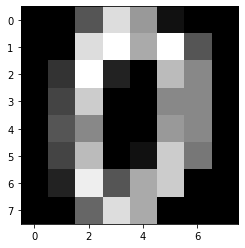

In [7]:
plt.gray()
plt.imshow(digits.images[0])

### 데이터 분리
train_test_split 함수를 이용해 학습 데이터와 테스트 데이터를 무작위로 8:2의 비율로 나누어 준다.

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(digits_data, digits_label, 
                                                        test_size=0.2, random_state=3)

print('Number of Train Data : ', len(X1_train))
print('Number of Test Data : ', len(X1_test))

Number of Train Data :  1437
Number of Test Data :  360


### A. Decision Tree

In [9]:
decision_tree = DecisionTreeClassifier(random_state=5)

decision_tree.fit(X1_train, y1_train)
y1_pred_dt = decision_tree.predict(X1_test)

print(classification_report(y1_test, y1_pred_dt))

print(confusion_matrix(y1_test, y1_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.78      0.83      0.81        35
           2       0.76      0.84      0.80        31
           3       0.75      0.90      0.82        40
           4       0.97      0.77      0.86        44
           5       0.91      0.79      0.85        38
           6       0.85      0.92      0.88        25
           7       0.91      0.93      0.92        42
           8       0.81      0.76      0.79        29
           9       0.76      0.76      0.76        29

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.86      0.85      0.85       360

[[45  0  0  0  0  1  1  0  0  0]
 [ 0 29  4  0  1  0  0  0  0  1]
 [ 0  3 26  1  0  0  1  0  0  0]
 [ 0  0  2 36  0  0  0  0  2  0]
 [ 2  3  0  0 34  2  1  2  0  0]
 [ 0  0  0  2  0 30  1  0  2  3]
 [ 0  0  1  0  0  0 23  0  1  0]
 [ 0  0  0

#### * Decission Tree를 이용한 분류의 정확도 : 85%

정답과 오답을 확인하기 위해 오차 행렬을 확인하였으나 눈에 잘 들어오지 않는다.  
또한 각 클래스별 데이터의 수가 다르기 때문에 단순 수치로는 비교가 불가능하다.  
이를 정규화하고 이미지로 표현해보자

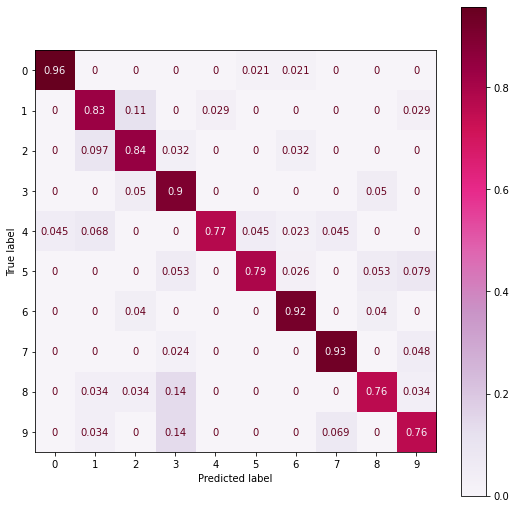

In [10]:
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_dt,
                                       cmap=plt.cm.PuRd,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 대각선의 색이 진할수록 더 정확한 모델이라 할 수 있다. 
- 가로로 읽었을 때 색이 다양한(진한) 클래스는 Recall 낮고, 세로로 읽었을 때 색이 다양한(진한) 클래스는 Precision이 낮다.


- 대표적으로 3의 경우 recall은 높으나 precision이 낮다.  
  3은 3으로 잘 판단을 하였으나 3이 아닌 숫자를 3으로 분류하는 경우가 많았다는 의미이다.
- 4의 경우 precision은 높으나 recall은 낮다.  
  다른 숫자를 4로 판단하는 경우는 적으나 4를 4로 분류하지 못하는 경우가 많았다는 의미이다.
  
  
- 전체적으로 색이 다양하고 클래스마다 precision과 recall의 편차가 크기 때문에 좋은 모델이라고 판단되진 않는다.


### B. Random Forest

In [11]:
random_forest = RandomForestClassifier(random_state=5)

random_forest.fit(X1_train, y1_train)
y1_pred_rf = random_forest.predict(X1_test)

print(classification_report(y1_test, y1_pred_rf))

print(confusion_matrix(y1_test, y1_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.99        40
           4       0.98      0.95      0.97        44
           5       0.97      0.92      0.95        38
           6       1.00      0.92      0.96        25
           7       0.95      1.00      0.98        42
           8       0.97      1.00      0.98        29
           9       0.90      0.97      0.93        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  0  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  1 35  0  0  0  2]
 [ 0  1  0  0  0  0 23  0  1  0]
 [ 0  0  0

#### * Random Forest를 이용한 분류의 정확도 : 97%

오차 행렬을 정규화하고 이미지로 표현해보자

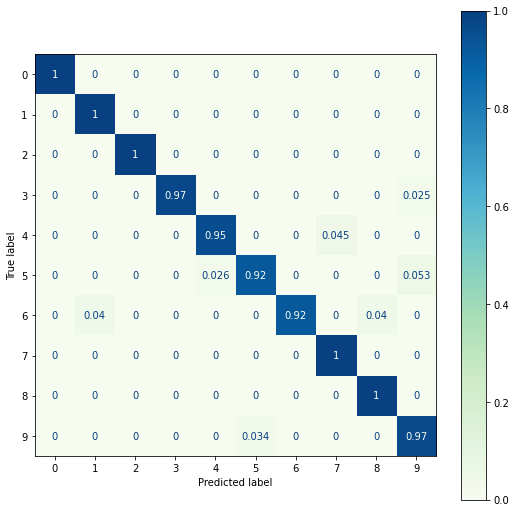

In [12]:
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_rf,
                                       cmap=plt.cm.GnBu,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 0, 1, 2, 7, 8 클래스에 대해서는 완벽하게 분류를 해냈다.
- 전체적으로 Decision Tree 모델보다 더 나은 성능을 보여준다.

### C. SVM

In [13]:
svm_model = SVC(random_state=5)

svm_model.fit(X1_train, y1_train)
y1_pred_svm = svm_model.predict(X1_test)

print(classification_report(y1_test, y1_pred_svm))

print(confusion_matrix(y1_test, y1_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        40
           4       1.00      0.98      0.99        44
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        25
           7       0.98      1.00      0.99        42
           8       0.97      1.00      0.98        29
           9       0.97      0.97      0.97        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  1  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0

#### * SVM을 이용한 분류의 정확도 : 99%

오차 행렬을 정규화하고 이미지로 표현해보자

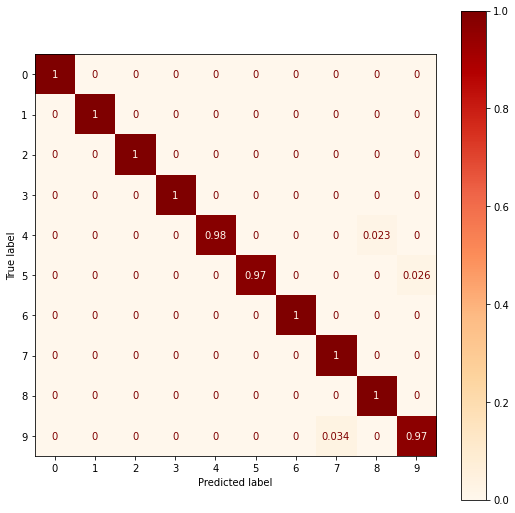

In [14]:
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_svm,
                                       cmap=plt.cm.OrRd,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 4, 5, 9 클래스를 제외한 나머지를 완벽하게 분류해냈다.
- 대각선의 색이 진하고 이를 제외한 나머지의 색이 비슷하므로 정확도도 높다.

### D. SGD Classifier

In [15]:
sgd_model = SGDClassifier(random_state=5)

sgd_model.fit(X1_train, y1_train)
y1_pred_sgd = sgd_model.predict(X1_test)

print(classification_report(y1_test, y1_pred_sgd))

print(confusion_matrix(y1_test, y1_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      0.89      0.93        35
           2       1.00      1.00      1.00        31
           3       1.00      0.95      0.97        40
           4       0.95      0.93      0.94        44
           5       0.97      0.89      0.93        38
           6       0.96      0.96      0.96        25
           7       0.98      0.98      0.98        42
           8       0.72      0.97      0.82        29
           9       0.89      0.86      0.88        29

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.95       360

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  2  0]
 [ 0  0  0  0 41  0  1  1  1  0]
 [ 0  0  0  0  0 34  0  0  1  3]
 [ 0  0  0  0  0  0 24  0  1  0]
 [ 0  0  0

#### * SGD Classifier을 이용한 분류의 정확도 : 94%

오차 행렬을 정규화하고 이미지로 표현해보자

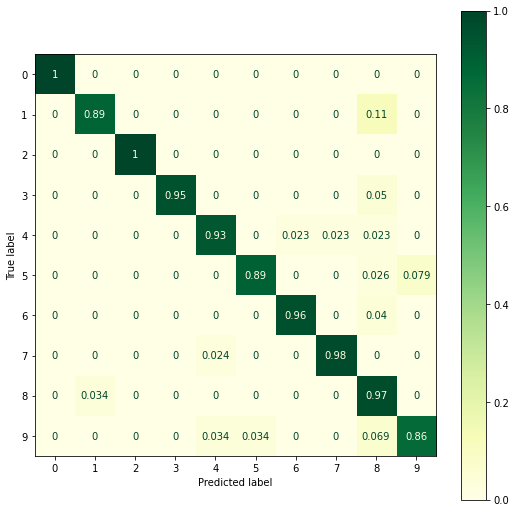

In [16]:
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_sgd,
                                       cmap=plt.cm.YlGn,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 세로 방향으로 읽었을 때 8에 대한 precision이 다른 클래스에 비해 현저히 낮음을 알 수 있다.
- Random Forest와 SVM 모델에 비해 전체적으로 색이 다양하므로 두 모델보다 정확도가 약간 낮음을 알 수 있다.

### E. Logistic Regression

In [17]:
logistic_model = LogisticRegression(max_iter=5000, random_state=5)

logistic_model.fit(X1_train, y1_train)
y1_pred_lr = logistic_model.predict(X1_test)

print(classification_report(y1_test, y1_pred_lr))

print(confusion_matrix(y1_test, y1_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.88      1.00      0.93        35
           2       0.97      1.00      0.98        31
           3       1.00      0.97      0.99        40
           4       0.97      0.89      0.93        44
           5       0.94      0.84      0.89        38
           6       1.00      0.92      0.96        25
           7       0.95      1.00      0.98        42
           8       0.88      0.97      0.92        29
           9       0.86      0.86      0.86        29

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.95      0.95       360

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  3  0  0 39  0  0  1  1  0]
 [ 0  1  0  0  1 32  0  0  0  4]
 [ 0  1  0  0  0  0 23  0  1  0]
 [ 0  0  0

#### * Logistic Regression을 이용한 분류의 정확도 : 95%

오차 행렬을 정규화하고 이미지로 표현해보자

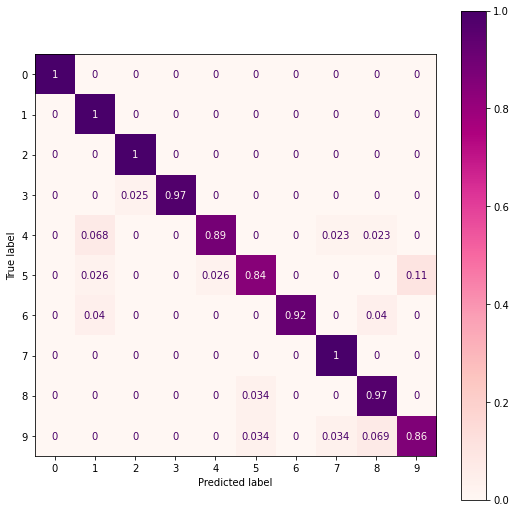

In [18]:
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_lr,
                                       cmap=plt.cm.RdPu,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 가로 방향으로 읽었을 때 4, 5, 9 클래스에 대한 recall 이 다른 클래스에 비해 낮음을 알 수 있다.
- SGD 모델과 마찬가지로 전체적으로 색 분포가 다양하므로 Random Forest와 SVM 모델에 비해 정확도가 낮다.

### 결과 분석

여러 가지 분류 모델들을 비교해보자.   
손글씨 분류의 경우, Precision과 Recall 중 중요성이 더 높은 것은 없다고 판단하여 정확도로 모델의 성능을 평가하고자 한다.

In [19]:
predictions = {'Decision Tree':y1_pred_dt, 'Random Forest':y1_pred_rf, 'SVM':y1_pred_svm,
               'SGD Classifier':y1_pred_sgd, 'Logistic Regression':y1_pred_lr}

for name, pred in predictions.items():
    print('{}의 정답률 : {}'.format(name, accuracy_score(y1_test, pred)))

Decision Tree의 정답률 : 0.85
Random Forest의 정답률 : 0.975
SVM의 정답률 : 0.9916666666666667
SGD Classifier의 정답률 : 0.9444444444444444
Logistic Regression의 정답률 : 0.9472222222222222


- DecisionTree를 제외한 4개의 모델은 모두 90% 이상의 정확도를 보인다.  


- 특히 Random Forest는 98%, SVM은 99%로 매우 높은 정확도를 보인다.  


- 손글씨 분류와 유사한 프로젝트에서는 SVM 모델을 사용하는 것을 추천한다. 

## 2. 와인 분류

### 데이터 로드 및 확인

load_wine( )를 이용해 데이터를 로드하고 데이터를 확인해보자.

In [20]:
from sklearn.datasets import load_wine

In [21]:
wine = load_wine()
wine_data = wine.data
wine_label = wine.target

print('데이터 로드 완료! ( ᐛ )و')

데이터 로드 완료! ( ᐛ )و


In [22]:
print(wine.keys())
print(wine.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['class_0' 'class_1' 'class_2']


- wine에 담겨있는 정보를 확인해보자.
- target_names는 와인 이름이 아닌 단순히 class_0, class_1, class_2이다.

In [23]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
print(wine_data.shape)

print(wine_label.shape)
print(wine_label[:])

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df['label'] = wine_label

wine_df

(178, 13)
(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


- 데이터와 라벨의 수가 같음을 확인할 수 있다.
- 라벨을 전체 출력해보았다.
- wine에 대한 정보를 한 눈에 보기 위해 라벨을 추가하여 데이터 프레임을 만들어준다.

### 데이터 분리
train_test_split 함수를 이용해 학습 데이터와 테스트 데이터를 무작위로 8:2의 비율로 나누어 준다.

In [25]:
# train, test 데이터 분리
X2_train, X2_test, y2_train, y2_test = train_test_split(wine_data, wine_label, 
                                                        test_size=0.2, random_state=1)

print('Number of Train Data : ', len(X2_train))
print('Number of Test Data : ', len(X2_test))

Number of Train Data :  142
Number of Test Data :  36


### A. Decision Tree

In [26]:
decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree.fit(X2_train, y2_train)
y2_pred_dt = decision_tree.predict(X2_test)

print(classification_report(y2_test, y2_pred_dt))

print(confusion_matrix(y2_test, y2_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.80      0.92      0.86        13
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36

[[13  1  0]
 [ 1 12  0]
 [ 0  2  7]]


#### * Decission Tree를 이용한 분류의 정확도 : 89%

오차 행렬을 정규화하고 이미지로 표현해보자

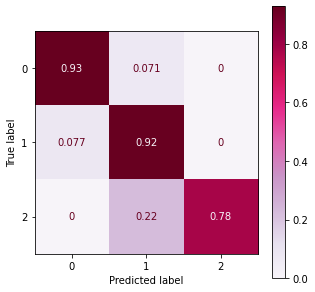

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred_dt,
                                       cmap=plt.cm.PuRd,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 가로로 읽었을 때 class_2에 대한 recall이 낮음을 알 수 있다.
- 세로로 읽었을 때 class_1에 대한 precision이 낮음을 알 수 있다.
- 전체적으로 색 분포가 다양하므로 정확도가 높지는 않다. 

### B. Random Forest

In [28]:
random_forest = RandomForestClassifier(random_state=10)

random_forest.fit(X2_train, y2_train)
y2_pred_rf = random_forest.predict(X2_test)

print(classification_report(y2_test, y2_pred_rf))

print(confusion_matrix(y2_test, y2_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]


#### * Random Forest를 이용한 분류의 정확도 : 97%

오차 행렬을 정규화하고 이미지로 표현해보자

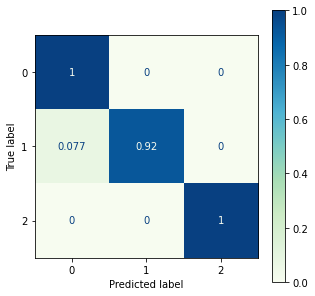

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred_rf,
                                       cmap=plt.cm.GnBu,
                                       normalize='true',
                                       ax=ax)
plt.show()

- class_1의 racall만 약간 낮고 나머지 클래스는 정확하게 분류했다.
- class_1을 잘못 판단한 경우는 모두 class_0으로 분류했다.

### C. SVM

In [30]:
svm_model = SVC(random_state=10)

svm_model.fit(X2_train, y2_train)
y2_pred_svm = svm_model.predict(X2_test)

print(classification_report(y2_test, y2_pred_svm))

print(confusion_matrix(y2_test, y2_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.58      0.85      0.69        13
           2       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36

[[11  0  3]
 [ 1 11  1]
 [ 0  8  1]]


#### * SVM을 이용한 분류의 정확도 : 64%

오차 행렬을 정규화하고 이미지로 표현해보자

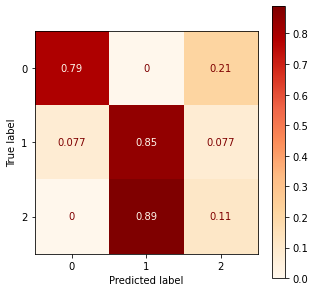

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred_svm,
                                       cmap=plt.cm.OrRd,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 대각선의 색이 진하지 않고 전체적으로 색 분포가 다양하므로 정확도가 매우 낮음을 알 수 있다.
- class_2에 대하여 대부분 class_1으로 분류하였다.
- 와인 분류와 같은 문제를 해결하기에 적절한 모델로 보이지 않는다.

### D. SGD Classifier

In [32]:
sgd_model = SGDClassifier(random_state=10)

sgd_model.fit(X2_train, y2_train)
y2_pred_sgd = sgd_model.predict(X2_test)

print(classification_report(y2_test, y2_pred_sgd))

print(confusion_matrix(y2_test, y2_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.83      0.38      0.53        13
           2       0.44      0.89      0.59         9

    accuracy                           0.69        36
   macro avg       0.76      0.71      0.68        36
weighted avg       0.80      0.69      0.70        36

[[12  0  2]
 [ 0  5  8]
 [ 0  1  8]]


#### * SGD Classifier을 이용한 분류의 정확도 : 69%

오차 행렬을 정규화하고 이미지로 표현해보자

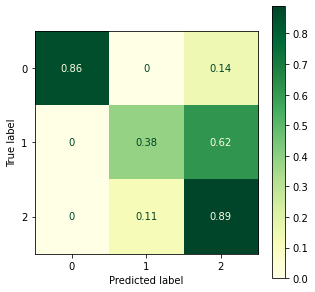

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred_sgd,
                                       cmap=plt.cm.YlGn,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 대각선이 선명하지 않고 전체적으로 색 분포가 다양하므로 정확도가 매우 낮음을 알 수 있다.
- class_1의 경우 반 이상을 class_2로 판단했다.
- 세로로 읽었을 때 class_2의 precision이 매우 낮음을 알 수 있다.
- 와인 분류와 같은 문제를 해결하기에 부적절한 모델로 판단된다.

### E. Logistic Regression

In [34]:
logistic_model = LogisticRegression(max_iter=5000, random_state=10)

logistic_model.fit(X2_train, y2_train)
y2_pred_lr = logistic_model.predict(X2_test)

print(classification_report(y2_test, y2_pred_lr))

print(confusion_matrix(y2_test, y2_pred_lr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

[[14  0  0]
 [ 1 12  0]
 [ 0  1  8]]


#### * Logistic Regression을 이용한 분류의 정확도 : 94%

오차 행렬을 정규화하고 이미지로 표현해보자

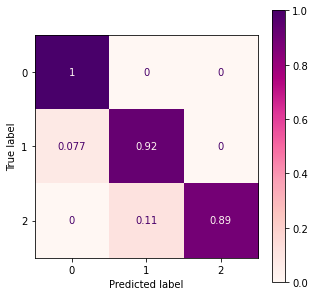

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred_lr,
                                       cmap=plt.cm.RdPu,
                                       normalize='true',
                                       ax=ax)
plt.show()

- 대각선이 선명하므로 정확도가 높음을 알 수 있다.
- class_0은 잘못 판단한 경우가 없다. (recall = 1)
- 다른 클래스를 class_2로 잘못 판단한 경우가 없다. (precision = 1)

### 결과 분석

여러 가지 분류 모델들을 비교해보자.   
와인 분류의 경우, 손글씨 분류와 마찬가지로 Precision과 Recall 중 중요성이 더 높은 것은 없다고 판단하여 정확도로 모델의 성능을 평가하고자 한다.

In [36]:
predictions = {'Decision Tree':y2_pred_dt, 'Random Forest':y2_pred_rf, 'SVM':y2_pred_svm,
               'SGD Classifier':y2_pred_sgd, 'Logistic Regression':y2_pred_lr}

for name, pred in predictions.items():
    print('{}의 정답률 : {}'.format(name, accuracy_score(y2_test, pred)))

Decision Tree의 정답률 : 0.8888888888888888
Random Forest의 정답률 : 0.9722222222222222
SVM의 정답률 : 0.6388888888888888
SGD Classifier의 정답률 : 0.6944444444444444
Logistic Regression의 정답률 : 0.9444444444444444


- Random Forest와 Logistic Regression만 90% 이상의 정확도를 보인다.


- 특히 SVM과 SGD Classifier는 매우 낮은 정확도를 보인다.  


- 와인 분류와 유사한 프로젝트에서는 Random Forest 모델을 사용하는 것을 추천하며 SVM과 SGD Classifier는 사용을 권하지 않는다.

## 3. 유방암 진단

### 데이터 로드 및 확인

load_breast_cancer( )를 이용해 데이터를 로드하고 데이터를 확인해보자.

In [37]:
from sklearn.datasets import load_breast_cancer

In [38]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target

print('데이터 로드 완료! ( ᐛ )و')

데이터 로드 완료! ( ᐛ )و


In [39]:
print(cancer.keys())
print(cancer.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']


- cancer에 담겨있는 정보를 확인해보자.
- target_names는 'malignat'(악성), 'benign'(양성)이다. 

In [40]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
print(cancer_data.shape)

print(cancer_label.shape)
print(cancer_label[:])

cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df['label'] = cancer.target_names[cancer_label]

cancer_df

(569, 30)
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


- 데이터와 라벨의 수가 같음을 확인할 수 있다.
- 라벨을 전체 출력해보았다.
- cancer에 대한 정보를 한 눈에 보기 위해 라벨을 추가하여 데이터 프레임을 만들어준다.

### 데이터 분리
train_test_split 함수를 이용해 학습 데이터와 테스트 데이터를 무작위로 8:2의 비율로 나누어 준다.

In [42]:
# train, test 데이터 분리
X3_train, X3_test, y3_train, y3_test = train_test_split(cancer_data, cancer_label, 
                                                    test_size=0.2, random_state=50)

print('Number of Train Data : ', len(X3_train))
print('Number of Test Data : ', len(X3_test))

Number of Train Data :  455
Number of Test Data :  114


### A. Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier(random_state=1)

decision_tree.fit(X3_train, y3_train)
y3_pred_dt = decision_tree.predict(X3_test)

print(classification_report(y3_test, y3_pred_dt))

print(confusion_matrix(y3_test, y3_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.97      0.95      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

[[37  2]
 [ 4 71]]


#### * Decission Tree를 이용한 분류의 정확도 : 95%

cancer 데이터는 암의 진단과 관련된 데이터이므로 비율 보다는 그 수 자체가 의미가 있다.  


- 악성 종양 환자를 양성 종양으로 판단하는 경우가 없어야한다.


- 하지만 이 모델은 데스트 데이터의 악성 종양 환자 39명 중 3명에게 양성 종양이라는 잘못된 진단을 했다.
- 정확도는 95%로 높지만 라벨 0에 대한 recall이 0.95이므로 완벽한 모델이라고 할 수는 없다.

### B. Random Forest

In [44]:
random_forest = RandomForestClassifier(random_state=1)

random_forest.fit(X3_train, y3_train)
y3_pred_rf = random_forest.predict(X3_test)

print(classification_report(y3_test, y3_pred_rf))

print(confusion_matrix(y3_test, y3_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[38  1]
 [ 3 72]]


#### * Random Forest를 이용한 분류의 정확도 : 96%

- 이 모델은 39명의 악성 종양 환자 중 1명에게 양성 종양이라는 잘못된 진단을 했다.
- Decission Tree와 정확도는 큰 차이가 없지만 라벨 0에 대한 recall이 0.97로 더 나은 성능을 보인다.

### C. SVM

In [45]:
svm_model = SVC(random_state=1)

svm_model.fit(X3_train, y3_train)
y3_pred_svm = svm_model.predict(X3_test)

print(classification_report(y3_test, y3_pred_svm))

print(confusion_matrix(y3_test, y3_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[34  5]
 [ 1 74]]


#### * SVM을 이용한 분류의 정확도 : 95%

- 이 모델은 39명의 악성 종양 환자 중 5명에게 잘못된 진단을 했다.
- 앞서 살펴 본 Decission Tree와 Random Forest 모델과 정확도는 비슷하지만 라벨 0에 대한 recall이 0.87로 셋 중 가장 낮은 성능을 보인다.

### D. SGD Classifier

In [46]:
sgd_model = SGDClassifier(random_state=1)

sgd_model.fit(X3_train, y3_train)
y3_pred_sgd = sgd_model.predict(X3_test)

print(classification_report(y3_test, y3_pred_sgd))

print(confusion_matrix(y3_test, y3_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        39
           1       0.92      0.95      0.93        75

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

[[33  6]
 [ 4 71]]


#### * SGD Classifier을 이용한 분류의 정확도 : 91%

- 이 모델은 39명의 악성 종양 환자 중 6명에게 잘못된 진단을 했다.
- 정확도도 91%로 앞서 살펴본 모델보다 낮고 라벨 0에 대한 recall이 0.85로 가장 낮은 성능을 보인다.

### E. Logistic Regression

In [47]:
logistic_model = LogisticRegression(max_iter=5000, random_state=1)

logistic_model.fit(X3_train, y3_train)
y3_pred_lr = logistic_model.predict(X3_test)

print(classification_report(y3_test, y3_pred_lr))

print(confusion_matrix(y3_test, y3_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[37  2]
 [ 1 74]]


#### * Logistic Regression을 이용한 분류의 정확도 : 97%

- 이 모델은 39명의 악성 종양 환자 중 2명에게 잘못된 진단을 했다.
- 정확도는 Random Forest보다 약간 높지만 라벨 0에 대한 recall이 0.95로 Random Forest 모델보다 낮은 성능을 보인다고 판단했다.

### 결과 분석

여러 가지 분류 모델들을 비교해보자.   
암환자 진단의 경우 악성 종양 환자를 양성 종양으로 진단하는 경우가 없어야하므로 라벨 0에 대한 recall 값이 중요하다고 판단하여 모델의 성능을 평가하는 지표로 삼고자 한다.

- Decision Tree : 0.95
- Random Forest : 0.97
- SVM : 0.87
- SGD Classifier : 0.85
- Logistic Regression : 0.95


- 유방암 진단과 유사한 문제에서는 Random Forest 모델을 사용하는 것을 추천하며 SVM과 SGD Classifier는 사용을 권하지 않는다.

## 4. 회고

#### (1) LogisticRegression 사용 시

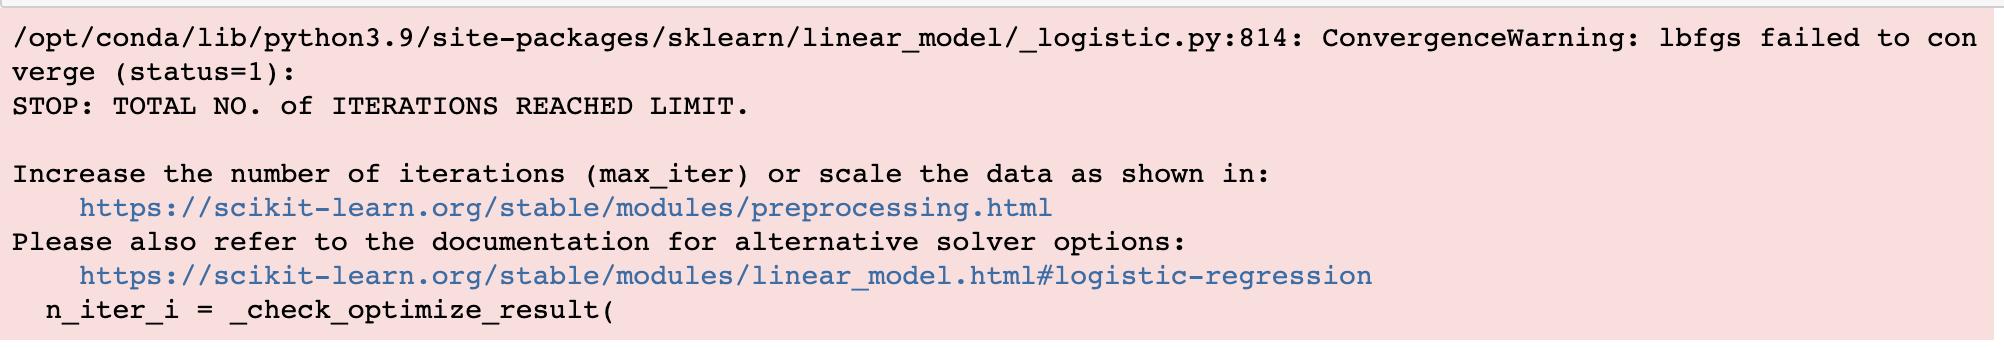
max_iter의 기본값은 100으로 별다른 값 지정 없이 학습 진행 시 경고가 발생한다. 학습에는 문제가 없지만 빨간창이 뜨는 것이 거슬려 max_iter를 키워주었다.


#### (2) color map 지정  
학습과는 무관하지만 confusion matrix를 이미지로 표현할 때 color map을 정하는 데에 시간을 많이 쏟았다.  
매력적인 색깔 조합들이 많아서 여러 컬러를 적용해보고 그 중 5개를 겨우 골라 사용하였다.


#### (3) SGD Classifier 성능 저하  
와인 분류 프로젝트에서 SGD Classifier의 random_state=42로 하였을때 class_2에 대해서는 전혀 정답을 맞추지 못하는 상황이 발생하였다. 이로 인해 정확도도 낮게 나왔으며 오차 행렬을 정규화 할 때 division by zero 오류가 발생하였다.  
또한 randaom_state=5로 하였을 때 정확도가 39%로 굉장히 낮게 나왔다.  
다른 모델들은 random_state를 바꾸어도 결과에 큰 차이가 없었는데 이 모델만 유독 차이가 심하게 나타났다.  
아직까지 명확한 이유를 찾지 못했으나, 데이터 세트에서 무작위로 선택된 하나의 샘플에 의존하여 각 단계의 예측 경사를 계산하는 방식이기 때문에 random_state에 영향을 많이 받는 것이라고 추측해본다.


## 5. 참고 자료

(1) max_iter 경고 해결  
https://nsbg.tistory.com/entry/Sklearn-ConvergenceWarning-lbfgs-failed-to-converge-status1

(2) color map  
https://matplotlib.org/stable/tutorials/colors/colormaps.html

(3) SGD Classifier  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier